In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
# Load a synthetic dataset
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Extracting Independent and Dependent variables
X = X  # Independent variables
y = y  # Dependent variable

In [4]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Fitting the Non-linear SVM classifier to the training set with RBF kernel
non_linear_svm = SVC(kernel='rbf')
non_linear_svm.fit(X_train, y_train)

SVC()

In [7]:
# Predicting the test set results for Non-linear SVM
non_linear_predictions = non_linear_svm.predict(X_test)

In [8]:
# Calculate accuracy for Non-linear SVM
non_linear_accuracy = accuracy_score(y_test, non_linear_predictions)


In [9]:
# Creating the confusion matrix for Non-linear SVM
cm_non_linear = confusion_matrix(y_test, non_linear_predictions)

C:\Users\user\AppData\Local\Temp\ipykernel_20632\1673947279.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


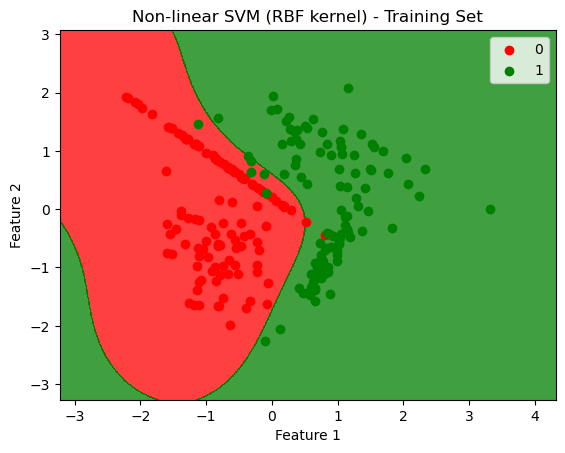

In [10]:
# Visualizing the training set results for Non-linear SVM
def visualize_results_non_linear(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, non_linear_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
# Visualizing the training set results for Non-linear SVM
visualize_results_non_linear(X_train, y_train, 'Non-linear SVM (RBF kernel) - Training Set')

C:\Users\user\AppData\Local\Temp\ipykernel_20632\1673947279.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


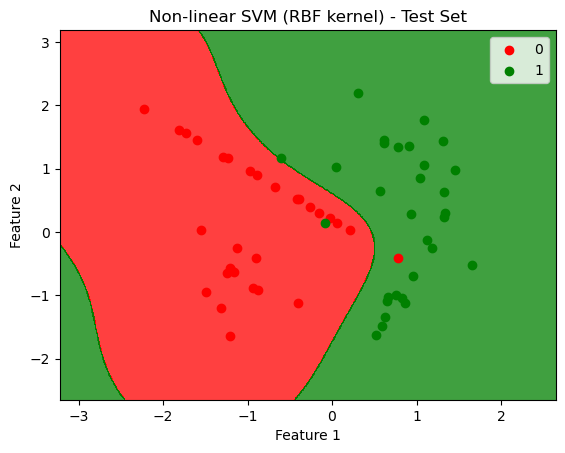

In [11]:
# Visualizing the test set results for Non-linear SVM
visualize_results_non_linear(X_test, y_test, 'Non-linear SVM (RBF kernel) - Test Set')

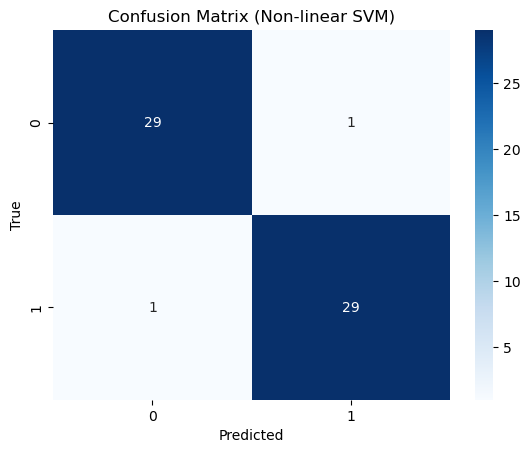

In [12]:
# Data Visualization for Non-linear SVM
sns.heatmap(cm_non_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Non-linear SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
# Display results for Non-linear SVM
print("Non-linear SVM (RBF kernel) Accuracy:", non_linear_accuracy)

Non-linear SVM (RBF kernel) Accuracy: 0.9666666666666667
